# Visualization with Seaborn

Seaborn is a Python data visualization library based on ``matplotlib``. It provides a high-level interface for drawing attractive and informative statistical graphics.
Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas ``DataFrame``s.

The link to documentation of [Seaborn](http://seaborn.pydata.org/)

Now, here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors:

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
import pandas as pd

Now we create some random walk data:

In [2]:
rng = np.random.RandomState(0) # Create some data

x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

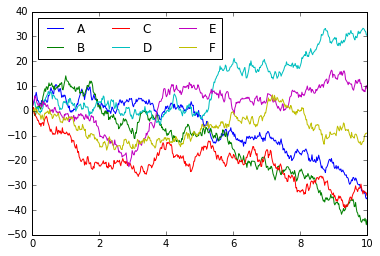

In [3]:
plt.plot(x, y) # Plot the data
plt.legend('ABCDEF', ncol=3, loc='upper left');

Now let's take a look at how it works with Seaborn.
Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.
We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [4]:
import seaborn as sns
sns.set()

Now let's rerun the same two lines as before:

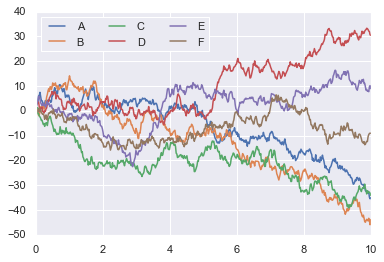

In [5]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=3, loc='upper left');

## Histograms, KDE, and densities

A histogram is an approximate representation of the distribution of numerical data.
KDE stands for kernel density estimation, and it's a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. It's also known as Parzen–Rosenblatt window method.

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

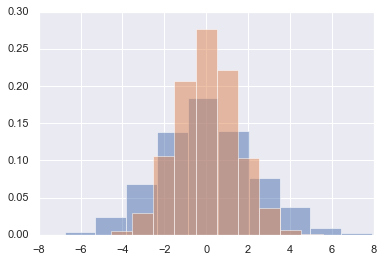

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with ``sns.kdeplot``:

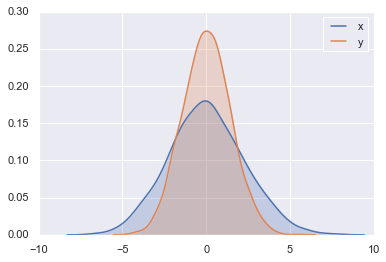

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histograms and KDE can be combined using ``distplot``:

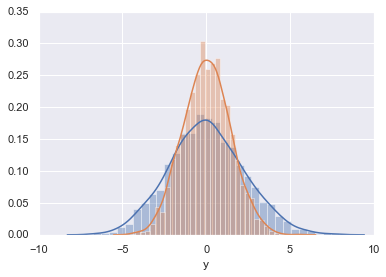

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

If we pass the full two-dimensional dataset to ``kdeplot``, we will get a two-dimensional visualization of the data:

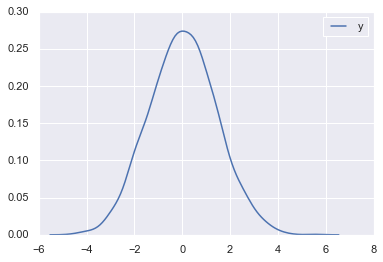

In [9]:
sns.kdeplot(data[col]);

We can see the joint distribution and the marginal distributions together using ``sns.jointplot``. For this plot, we'll set the style to a white background:

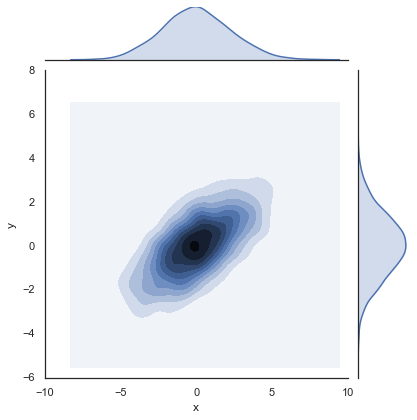

In [10]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

There are other parameters that can be passed to ``jointplot``—for example, we can use a hexagonally based histogram instead:

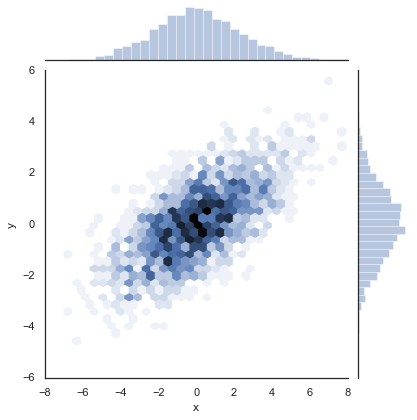

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Visualizing the iris dataset

It is a well-known dataset, which lists measurements of petals and sepals of three iris species:

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


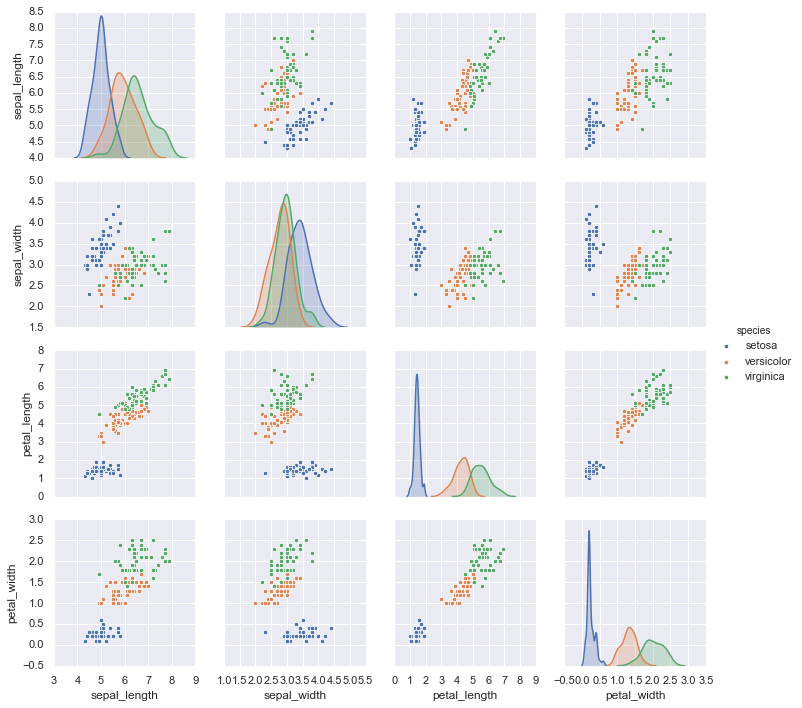

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

## Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [14]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


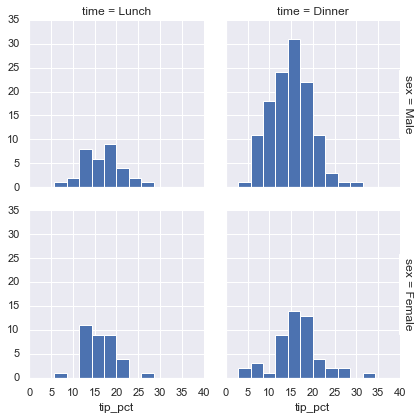

In [15]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Planets dataset

Time series can be plotted using ``sns.factorplot``

In [16]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


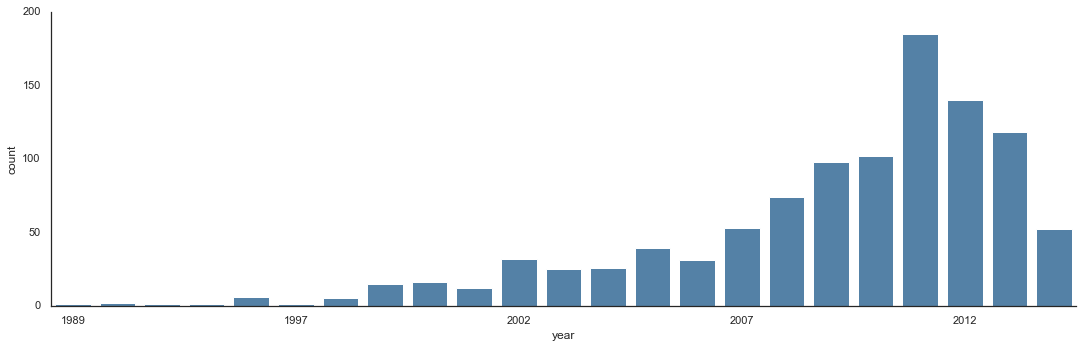

In [17]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=3,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

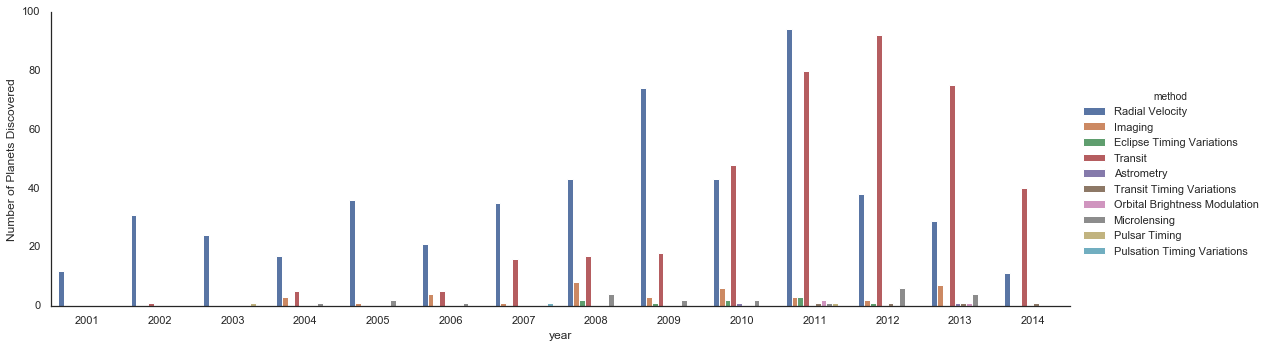

In [18]:
with sns.axes_style('white'):
    g = sns.catplot("year", data=planets, aspect=3.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')